<a href="https://colab.research.google.com/github/ajayramezh/CAKE/blob/master/1_Titanic_Complete_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
local_path='/content/titanic'

In [0]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylabb
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Other settings and Configure visualisations
import warnings
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
warnings.filterwarnings('ignore')



# Utilities
import inflection 

### 1.Story 
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

### 2.Data 
We collected the data from Kaggle competation.

In [0]:
train = pd.read_csv(local_path+"/train.csv")
test = pd.read_csv(local_path+"/test.csv")

In [4]:
print("Data dimentions:\nTrain Data Set :{}  \nTest Data Set :{}".format(train.shape, test.shape))

Data dimentions:
Train Data Set :(891, 12)  
Test Data Set :(418, 11)


In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### 3.Data Pre-Processing - Stage I
We are going to process each feature one by one

#### 3.1 Column Name regeneration 

In [7]:
!pip install inflection

In [0]:
# cleaning column names
train.columns = [inflection.underscore(feature) for feature in train.columns]
test.columns = [inflection.underscore(feature) for feature in test.columns]

#### 3.2 Analysis on Null values

In [9]:
clean_features=pd.DataFrame(data={'Train(%error)':train.isnull().sum()/train.shape[0]*100,'Test(%error)':test.isnull().sum()/train.shape[0]*100})
clean_features.transpose()

,age,cabin,embarked,fare,name,parch,passenger_id,pclass,sex,sib_sp,survived,ticket
Train(%error),19.865320,77.104377,0.224467,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Test(%error),9.652076,36.700337,0.000000,0.112233,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [10]:
train.head()

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3.3 Clean - Cabin Feature

Let's fill this feature with TODO

In [0]:
train.cabin.fillna("TODO_C", inplace=True)
test.cabin.fillna("TODO_C", inplace=True)

#### 3.4 Clean - Age
Let's fill this age with Average age

In [0]:
train.age.fillna(train.age.median(), inplace=True)
test.age.fillna(train.age.median(), inplace=True)

#### 3.4 Clean - embarked

In [13]:
train.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [0]:
train.embarked.fillna("TODO_E", inplace=True)
test.embarked.fillna("TODO_E", inplace=True)

#### 3.5 Clean - fare
test column has few nan value, filling with average value

In [0]:
test.fare.fillna(test.fare.median(),inplace=True)

#### 3.6 Final Check 


In [16]:
clean_features=pd.DataFrame(data={'Train(%error)':train.isnull().sum()/train.shape[0]*100,'Test(%error)':test.isnull().sum()/train.shape[0]*100})
clean_features.transpose()

,age,cabin,embarked,fare,name,parch,passenger_id,pclass,sex,sib_sp,survived,ticket
Train(%error),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Test(%error),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


### 4.Data Visualization - Stage I
[link text](https://)

#### 4.1 How many male and female survived 

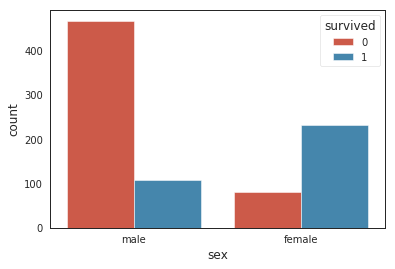

In [17]:
sns.countplot(x='sex',  hue='survived', data=train)

#### 4.2 Look on different classes vs Survival

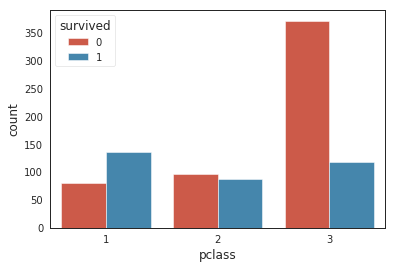

In [18]:
sns.countplot(x='pclass',  hue='survived', data=train)

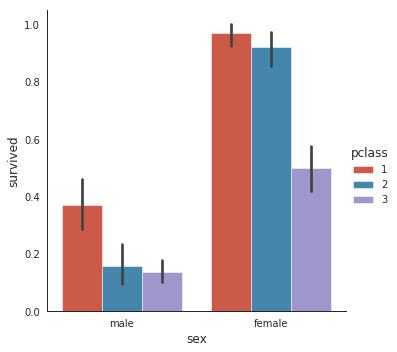

In [36]:
sns.catplot(x="sex", y="survived", hue="pclass", kind="bar", data=train);

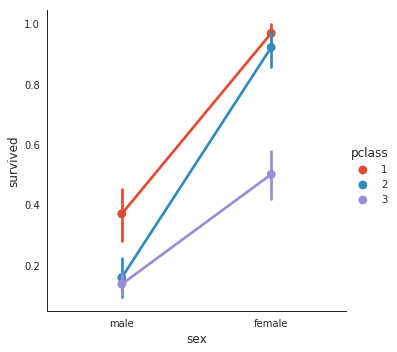

In [41]:
sns.catplot(x="sex", y="survived", hue="pclass", kind="point", data=train);

#### 4.3 Study on Age

In [0]:
hue_colors={"male":"green", "female":"red"}

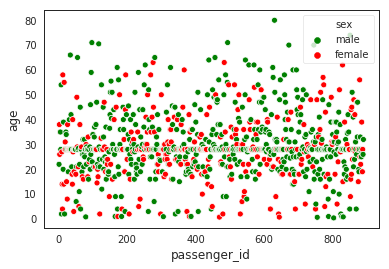

In [20]:
sns.scatterplot(x='passenger_id', y='age', data=train, hue='sex', palette=hue_colors)

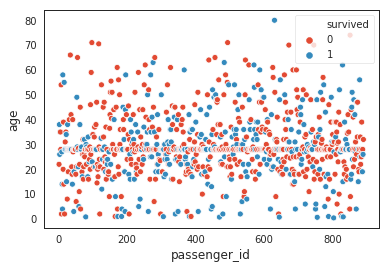

In [21]:
sns.scatterplot(x='passenger_id', y='age', data=train, hue='survived')

If you see the pattern, younger men and older women survived. 

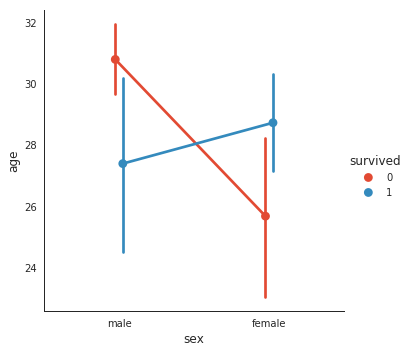

In [60]:
sns.catplot(x="sex", y="age", hue='survived', kind="point", data=train, dodge=True)

In [62]:
train.age.median()

28.0

#### 4.4 Study on Price

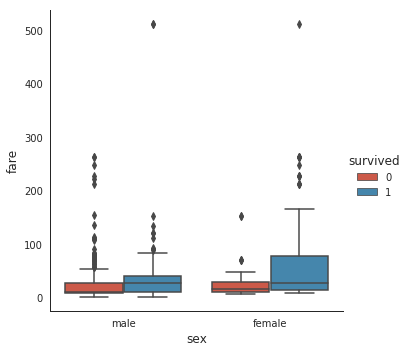

In [27]:
sns.catplot(x="sex", y="fare", hue="survived", kind="box", data=train);

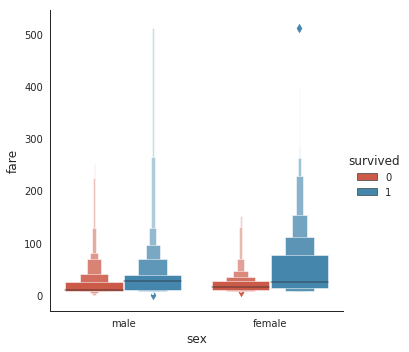

In [32]:
sns.catplot(x="sex", y="fare", kind="boxen", hue='survived', data=train);

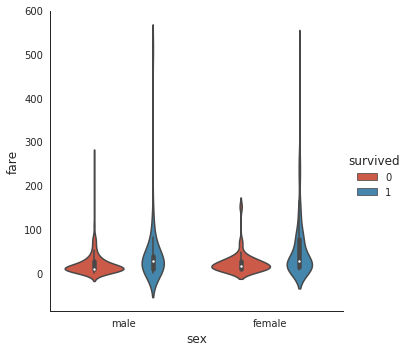

In [33]:
sns.catplot(x="sex", y="fare", kind="violin", hue='survived', data=train);

#### 4.5 Study on Deck

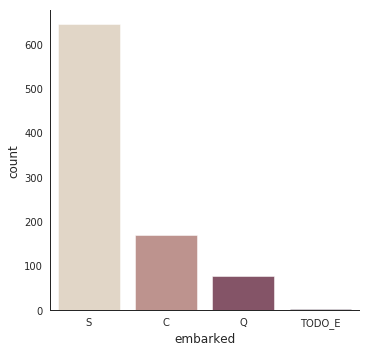

In [40]:
sns.catplot(x="embarked", kind="count", palette="ch:.25", data=train);